In [1]:
import pandas as pd
import numpy as np

In [2]:
cat_dog_data = pd.read_csv('dogs_cats/dogs_n_cats.csv')

In [3]:
cat_dog_data

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [5]:
cat_dog_data.isnull().sum()

Длина                 0
Высота                0
Шерстист              0
Гавкает               0
Лазает по деревьям    0
Вид                   0
dtype: int64

In [6]:
cat_dog_data = pd.get_dummies(cat_dog_data)
cat_dog_data

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид_котик,Вид_собачка
0,15,18.0,1,1,0,0,1
1,20,24.0,1,0,0,0,1
2,34,40.8,1,1,0,0,1
3,26,31.2,1,1,0,0,1
4,16,19.2,1,1,0,0,1
...,...,...,...,...,...,...,...
995,8,3.2,1,0,1,1,0
996,7,2.8,1,0,1,1,0
997,6,2.4,1,0,1,1,0
998,7,2.8,1,0,1,1,0


In [8]:
X = cat_dog_data.drop(['Вид_котик', 'Вид_собачка'], axis=1)
X

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0
...,...,...,...,...,...
995,8,3.2,1,0,1
996,7,2.8,1,0,1
997,6,2.4,1,0,1
998,7,2.8,1,0,1


In [9]:
y = cat_dog_data['Вид_котик']
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: Вид_котик, Length: 1000, dtype: uint8

In [15]:
y.value_counts()

0    500
1    500
Name: Вид_котик, dtype: int64

In [16]:
from sklearn import tree

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
np.random.seed(0)
cat_scores = pd.DataFrame()
for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cv = cross_val_score(clf, X_train, y_train, cv=5).mean()
    tmp_scores = pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [train_score],
        'test_score': [test_score],
        'mean_cv_score': [mean_cv]
    })
    cat_scores = cat_scores.append(tmp_scores)
cat_scores
    

,max_depth,train_score,test_score,mean_cv_score
0,1,1.0,1.0,1.0
0,2,1.0,1.0,1.0
0,3,1.0,1.0,1.0
0,4,1.0,1.0,1.0
0,5,1.0,1.0,1.0
...,...,...,...,...
0,95,1.0,1.0,1.0
0,96,1.0,1.0,1.0
0,97,1.0,1.0,1.0
0,98,1.0,1.0,1.0


In [24]:
cat_scores_long = cat_scores.melt(
    id_vars=['max_depth'], 
    value_vars=['train_score', 'test_score', 'mean_cv_score'],
    var_name='score_type',
    value_name='scores'
)
cat_scores_long

,max_depth,score_type,scores
0,1,train_score,1.0
1,2,train_score,1.0
2,3,train_score,1.0
3,4,train_score,1.0
4,5,train_score,1.0
...,...,...,...
292,95,mean_cv_score,1.0
293,96,mean_cv_score,1.0
294,97,mean_cv_score,1.0
295,98,mean_cv_score,1.0


In [25]:
import seaborn as sns

<AxesSubplot:xlabel='max_depth', ylabel='scores'>

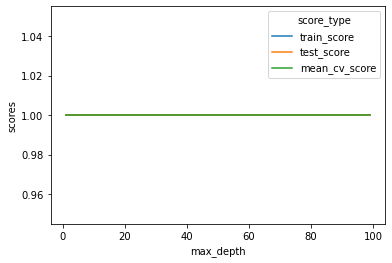

In [27]:
sns.lineplot(data=cat_scores_long, x='max_depth', y='scores', hue='score_type')

In [28]:
final_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [29]:
final_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [30]:
test_data = pd.read_json('dogs_cats/dataset_209691_15.txt')
test_data

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,21,25.2,1,1,0
1,30,36.0,1,1,0
2,22,26.4,1,1,0
3,24,28.8,1,1,0
4,21,25.2,1,1,0
...,...,...,...,...,...
95,5,2.0,1,0,1
96,13,5.2,1,0,1
97,11,4.4,1,0,1
98,6,2.4,1,0,1


In [31]:
y_pred = final_clf.predict(test_data)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [35]:
y_pred.size - y_pred.sum()

41